In [1]:
from autograd import numpy as np
import matplotlib.pyplot as plt 
import lifelines
from myfunctions import PlottingLL  
from myfunctions import CoxRegressionModel
from myfunctions import SevenPlot


stime = np.load('stime_eb25_ap25_Mu0.50_Np30_logsp1.npy')
Ne, Na, Nm, Np = 25,25,1,30

#binary semi-major axis
ab = 1

#binary eccentricity
ebs = np.linspace(0.,0.7,Ne)
#print(ebs)

    
#test particle semi- major axis 
aps = ab*np.linspace(1.,5.,Na)


# for x in range(0,25,6):
#     print(ebs[x])

value = 25
for y in range(0,value,3):
    print(aps[y])
    
    

1.0
1.5
2.0
2.5
3.0
3.5
4.0
4.5
5.0


750
750


/cita/h/home-2/namulla/A1/SURP INTRO PROJECT/myfunctions/CoxRegressionModel.py:72: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,axes = plt.subplots()


                T  E  aps
0      102.400265  1  1.0
1       62.831853  1  1.0
2       62.831853  1  1.0
3       62.831853  1  1.0
4       62.831853  1  1.0
..            ... ..  ...
745  62831.853072  0  5.0
746  62831.853072  0  5.0
747  62831.853072  0  5.0
748  62831.853072  0  5.0
749  62831.853072  0  5.0

[750 rows x 3 columns]


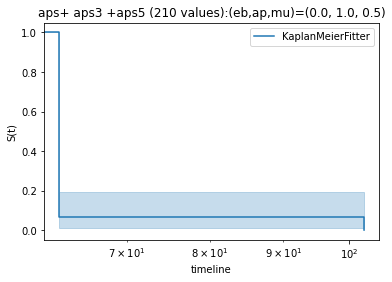

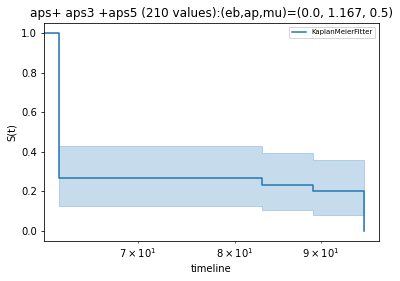

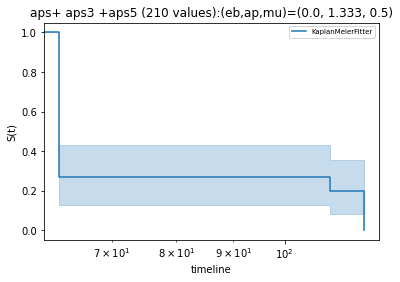

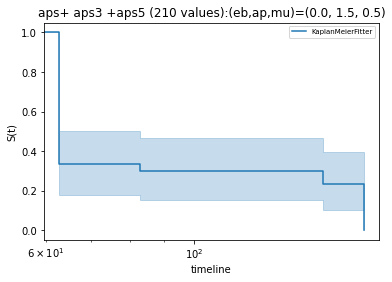

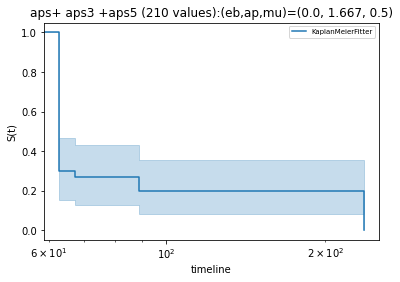

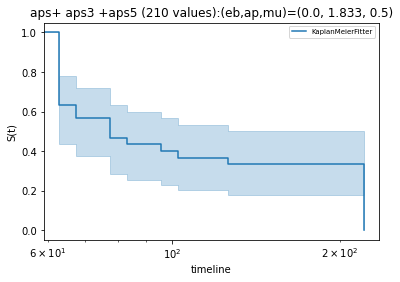

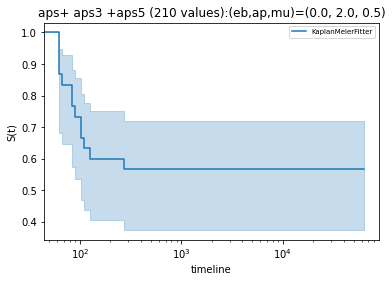

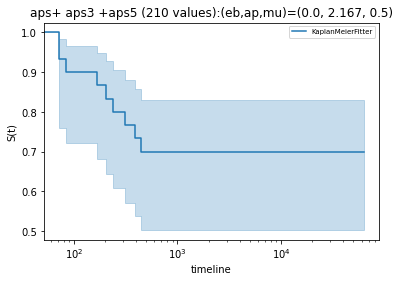

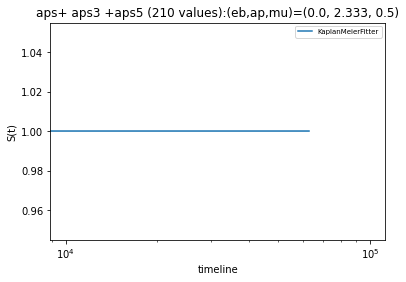

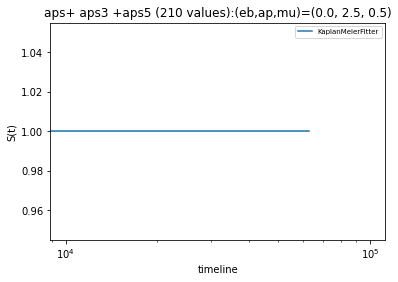

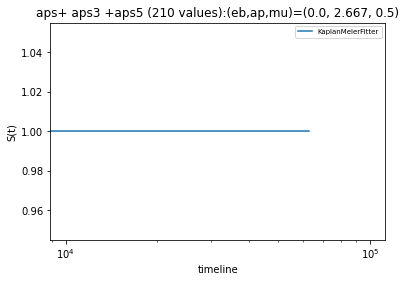

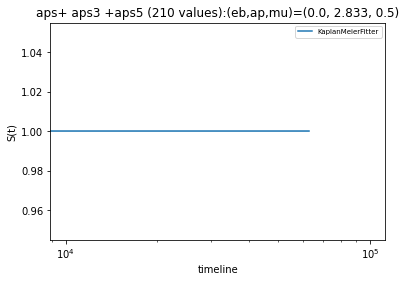

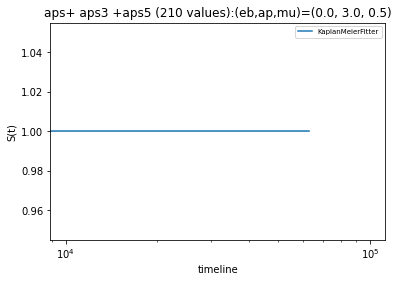

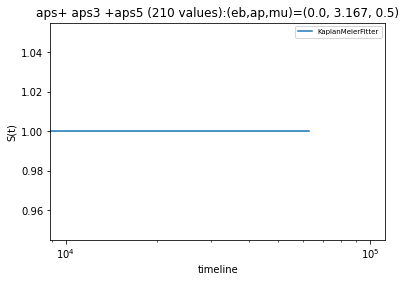

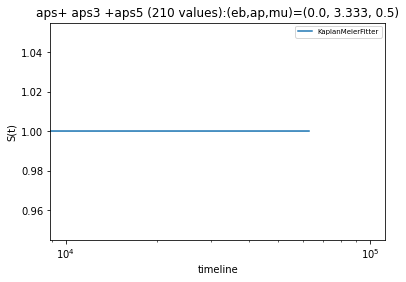

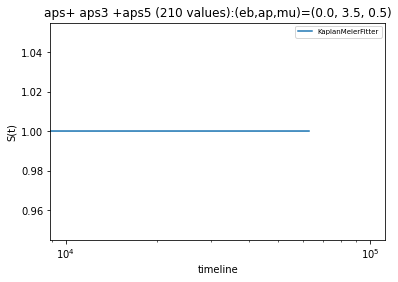

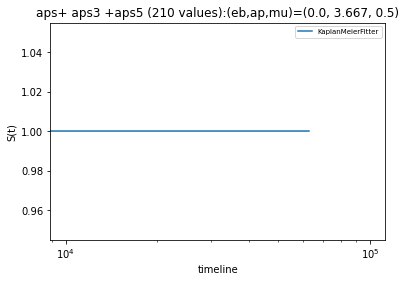

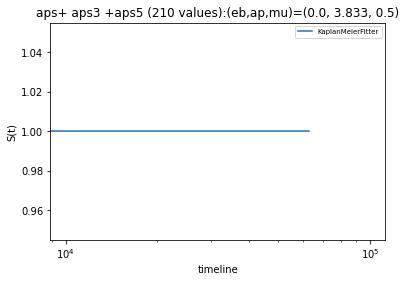

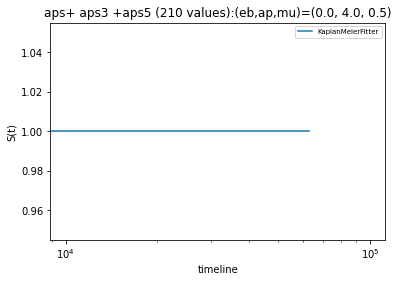

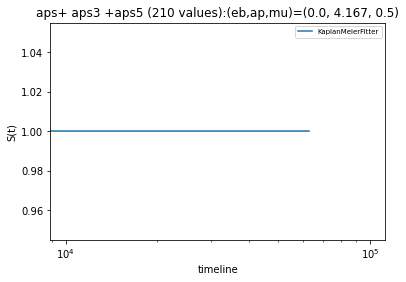

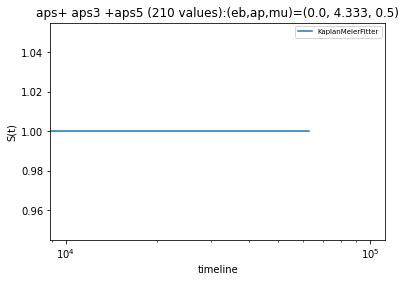

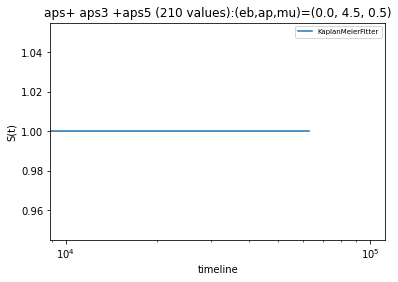

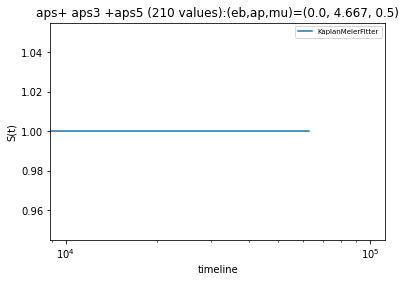

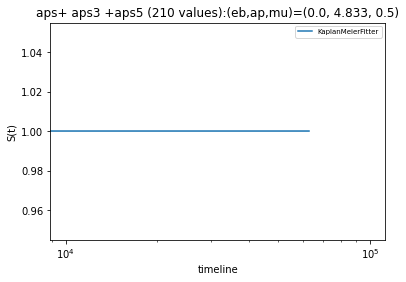

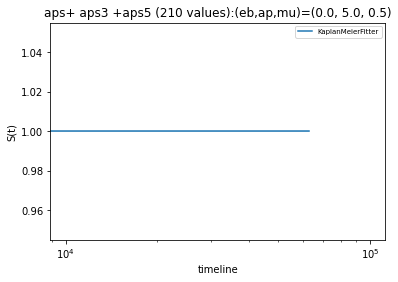

In [2]:
#Binary reduced mass
mu = 0.500

#for 5 values of eb and 7 values of ap with 30 survival times each = we have a total of 1050 values

#for the entire length of eb (25) and ap (25) values with 30 survival times each = we have a total of 18 750 values 
ap_s = []
ap_s2 = []
ap_s3 = []
ap_s5 = []
stimes = []
eap_ = []
ebb_ = []

# aps2 = []
# aps3 = []
# aps5 = []
# eap_0 = []


for y in range(0,value,1):
    stimes.append(stime[0,y,:])
    n = 30
    
    app = [aps[y]]*n
    ap_s.append(app)
    
#*******************************************************************************************************#
# for x in range(0,25,1):
#     for y in range(0,25,1):

#         stimes.append(stime[x,y,:])
#         n = 30

#         app = [aps[y]]*n
#         ap_s.append(app)

#         #app2 = [aps[y]**2]*n
#         #ap_s2.append(app2)
#         #aps2.append([aps[y]**2])

#         #app3 = [aps[y]**3]*n
#         #ap_s3.append(app3)
#         #aps3.append([aps[y]**3])

#         #app5 = [aps[y]**5]*n
#         #ap_s5.append(app5)
#         #aps5.append([aps[y]**5])

#         #eap = [np.exp([aps[y]])]*n
#         #eap_.append(eap)
#         #eap_0.append(np.exp([aps[y]]))
        
#     N = 750
#     ebb = [ebs[x]]*N
#     ebb_.append(ebb)

#         #PlottingLL.PlottingLL(np.abs(ebs[0]),aps[x],mu,stime[0,x,:],Np)
#         #print(aps[x],stime[0,x,:])

#*********************************************************************************************************#
    


#1050 values   
stimes = list(np.concatenate(stimes).flat)
print(len(stimes))
ap_s = list(np.concatenate(ap_s).flat)
#print(stimes)
#print((ap_s))
#print(ap_s)
#ap_s2 = list(np.concatenate(ap_s2).flat)
#print(ap_s2)
#ap_s3 = list(np.concatenate(ap_s3).flat)
#print(ap_s3)
#ap_s5 = list(np.concatenate(ap_s5).flat)
#print(ap_s5)
#eap_ = list(np.concatenate(eap_).flat)
#print(eap_)

#*********************************************************************************************#
# ebb_ = list(np.concatenate(ebb_).flat)
# print(len(ebb_))
#*********************************************************************************************#

# aps2 = list(np.concatenate(aps2).flat)
# aps3 = list(np.concatenate(aps3).flat)
# aps5 = list(np.concatenate(aps5).flat)
# eap_0 = list(np.concatenate(eap_0).flat)


N = len(ap_s)
print(N)
#N = 18750


#for x in range(0,25,6):
#   for y in range(3,10,1):


#******************************************************************************************************#
# for x in range(0,25,18):
#     for y in range(3,10,3):
#         CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s, ap_s2, ap_s3,ap_s5,ebb_,eap_,np.abs(ebs[x]),aps[y],mu,stime[x,y,:],Np)
       
#******************************************************************************************************#

for y in range(0,value,1):
    df = CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s,np.abs(ebs[0]),aps[y],mu,stime[0,y,:],Np)

    

print(df)
    
    
#CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s,np.abs(ebs),aps,mu,stime,Np)
#CoxRegressionModel.CoxRegressionModel(stimes,N,ap_s)
#SevenPlot.SevenPlot(stime,Np,aps)


In [8]:
from autograd.scipy.special import expit
from lifelines.fitters import ParametricRegressionFitter


class CureModel(ParametricRegressionFitter):
    _scipy_fit_method = "SLSQP"
    _scipy_fit_options = {"ftol": 1e-10, "maxiter": 200}

    _fitted_parameter_names = ["lambda_", "beta_", "rho_"]

    def _cumulative_hazard(self, params, T, Xs):
#         print(type(Xs["beta_"]))
#         print(Xs["beta_"])
#         print(type(params["beta_"]))
#         print(params["beta_"])

        c = expit(np.dot(Xs["beta_"], params["beta_"]))
#         print(c)
    
#         p = np.where(c<0, 0., c)
#         p = np.where(c>1, 1., c)

#         print(Xs["lambda_"])
#         print(params["lambda_"]) #should only be an array of 1 value each since our only covariate is aps
        lambda_ = np.exp(np.dot(Xs["lambda_"], params["lambda_"]))
#         print(lambda_) # all 1's

#         print(Xs["rho_"])
#         print(params["rho_"])

        rho_ = np.exp(np.dot(Xs["rho_"], params["rho_"]))
#         print(rho_)
#         print(sf)
#         print(-np.log((1 - c) + c * sf))


        sf = np.exp(-(T / lambda_) ** rho_)

        return -np.log((1 - c) + c * sf)  #     -np.log((1-p) + p *sf)




cm = CureModel(penalizer=0.0)


covariates = {"lambda_": df.columns.difference(['T', 'E']), "rho_": '1', "beta_":'aps + 1'}

cm.fit(df, "T", event_col="E", regressors=covariates,show_progress = True, timeline=np.arange(10000))
cm.print_summary(2)



#***************************************************#
# cm.predict_survival_function(df.loc[::100]).plot(figsize=(12,6))
# #***************************************************#
# # what's the effect on the survival curve if I vary "age"
# fig, ax = plt.subplots(figsize=(12, 6))

# cm.plot_covariate_groups(['age'], values=np.arange(20, 50, 5), cmap='coolwarm', ax=ax)



Optimization terminated successfully    (Exit mode 0)
            Current function value: 12.40325836772154
            Iterations: 32
            Function evaluations: 32
            Gradient evaluations: 32
     fun: 12.40325836772154
     jac: array([ 1.26951704e-10,  1.08862060e-10, -3.16177887e-36,  1.53560759e-35])
 message: 'Optimization terminated successfully'
    nfev: 32
     nit: 32
    njev: 32
  status: 0
 success: True
       x: array([-8.67084564e+00, -1.33127776e+01,  6.33261153e-27, -2.73239586e-26])


/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/fitters/__init__.py:2053: StatisticalWarning: The diagonal of the variance_matrix_ has negative values. This could be a problem with CureModel's fit to the data.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too.

  warnings.warn(warning_text, exceptions.StatisticalWarning)
/cita/modules/python/3.10.2/lib/python3.10/site-packages/lifelines/utils/printer.py:62: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return summary_df[columns].to_latex(float_format="%." + str(self.decimals) + "f")


<lifelines.CureModel: fitted with 750 total observations, 548 right-censored observations>
             duration col = 'T'
                event col = 'E'
   number of observations = 750
number of events observed = 202
           log-likelihood = -9302.44
         time fit was run = 2022-06-28 15:17:20 UTC

---
                    coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                         
lambda_ aps         0.00       1.00   35416.98        -69416.01         69416.01                 0.00                  inf
rho_    Intercept  -0.00       1.00   49528.25        -97073.58         97073.58                 0.00                  inf
beta_   Intercept  -8.67       0.00        NaN              NaN              NaN                  NaN                  NaN
        aps       -11.07       0.00        NaN              NaN              NaN                  NaN                  NaN

                      z    p   -log2(p)
param   covariate                      
lambda_ aps        0.00 1.00      -0.00
rho_    Intercept -0.00 1.00      -0.00
beta_   Intercept   NaN  NaN        NaN
        aps         NaN  NaN        NaN
---
AIC = 18612.89
log-likelihood ratio test = -0.00 on 1 df
-log2(p) of ll-ratio test = -0.00

In [4]:
# import math
# i,j=0,0
# PLOTS_PER_ROW = 5
# fig, axs = plt.subplots(math.ceil(len(df.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
# for col in df.columns:
#     axs[i][j].scatter(df['target_col'], df[col], s=3)
#     axs[i][j].set_ylabel(col)
#     j+=1
#     if j%PLOTS_PER_ROW==0:
#         i+=1
#         j=0
# plt.show()